In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

df_train = pd.read_csv('train.csv')

print(df_train.columns)

Index(['budget', 'action', 'adventure', 'fantasy', 'science fiction', 'crime',
       'drama', 'thriller', 'animation_x', 'family',
       ...
       'post production consulting', 'co-writer', 'prosthetic designer',
       'sound montage associate', 'radio play', 'key animation',
       'mechanical & creature designer', 'interior designer',
       'imaging science', 'settings'],
      dtype='object', length=473)


In [48]:
# Check the columns using dtypes
print(df_train.dtypes)

budget                                         int64
action                                         int64
adventure                                      int64
fantasy                                        int64
science fiction                                int64
crime                                          int64
drama                                          int64
thriller                                       int64
animation_x                                    int64
family                                         int64
western                                        int64
comedy                                         int64
romance                                        int64
horror                                         int64
mystery                                        int64
history                                        int64
war                                            int64
music_x                                        int64
documentary                                   

In [49]:
# Randomly sample 5 records with .sample(5)
df_train.sample(5)

,budget,action,adventure,fantasy,science fiction,crime,drama,thriller,animation_x,family,...,post production consulting,co-writer,prosthetic designer,sound montage associate,radio play,key animation,mechanical & creature designer,interior designer,imaging science,settings
4681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4377,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
814,54000000,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2811,12516654,0,0,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4260,1400000,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
# Get summary statistics using .describe()
df_train[["budget", "popularity", "production_companies", "production_countries", "revenue", "runtime", "vote_average", "vote_count", "malecastsnum", "femalecastsnum", "unknowngendercastsnum", "totalcasts", "malecrewsnum", "femalecrewsnum", "unknowngendercrewsnum", "totalcrews"]].describe()

,budget,popularity,production_companies,production_countries,revenue,runtime,vote_average,vote_count,malecastsnum,femalecastsnum,unknowngendercastsnum,totalcasts,malecrewsnum,femalecrewsnum,unknowngendercrewsnum,totalcrews
count,4.803000e+03,4803.000000,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000
mean,2.904504e+07,21.492301,2.847595,1.339996,8.226064e+07,106.875859,6.092172,690.217989,10.054341,5.031855,7.036852,22.123048,8.952738,2.449303,15.577139,26.979180
std,4.072239e+07,31.816650,2.231894,0.799285,1.628571e+08,22.611935,1.194612,1234.585891,7.942877,5.368746,11.176134,19.582493,7.877898,2.837117,24.587755,31.628564
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.900000e+05,4.668070,1.000000,1.000000,0.000000e+00,94.000000,5.600000,54.000000,5.000000,2.000000,1.000000,11.000000,3.000000,0.000000,2.000000,8.000000
50%,1.500000e+07,12.921594,2.000000,1.000000,1.917000e+07,103.000000,6.200000,235.000000,8.000000,4.000000,4.000000,16.000000,8.000000,2.000000,6.000000,16.000000
75%,4.000000e+07,28.313505,4.000000,2.000000,9.291719e+07,118.000000,6.800000,737.000000,13.000000,6.000000,8.000000,25.000000,12.000000,4.000000,17.000000,32.000000
max,3.800000e+08,875.581305,26.000000,12.000000,2.787965e+09,338.000000,10.000000,13752.000000,88.000000,107.000000,164.000000,224.000000,264.000000,56.000000,388.000000,435.000000


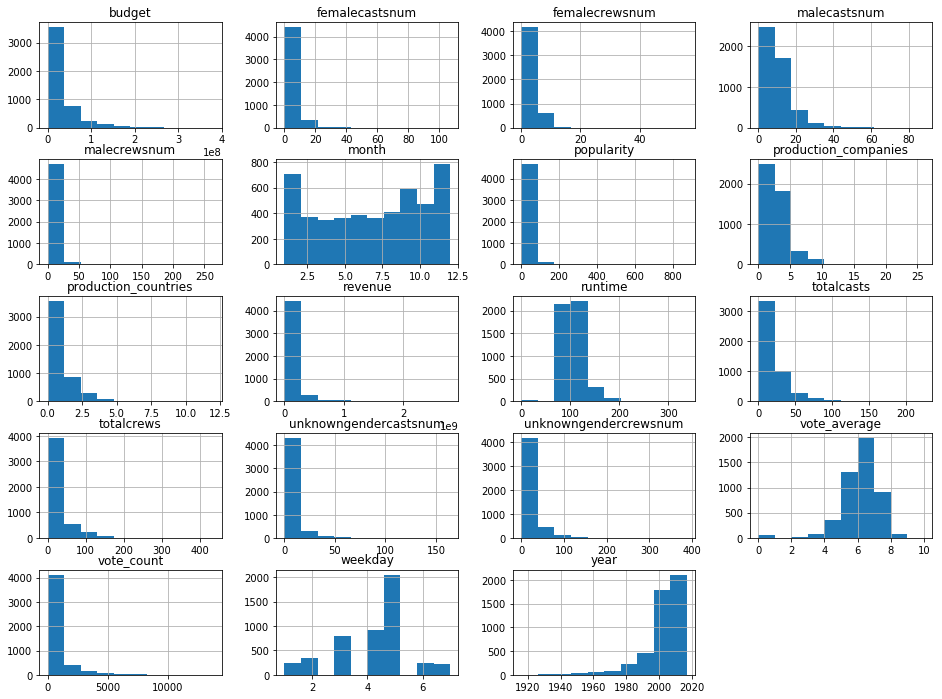

In [58]:
# Set the size of the figure
plt.rcParams["figure.figsize"] = [16,12]
# Plot histograms for all attributes
df_train[["budget", "popularity", "production_companies", "production_countries", "weekday", "month", "year", "revenue", "runtime", "vote_average", "vote_count", "malecastsnum", "femalecastsnum", "unknowngendercastsnum", "totalcasts", "malecrewsnum", "femalecrewsnum", "unknowngendercrewsnum", "totalcrews"]].hist()
plt.show()

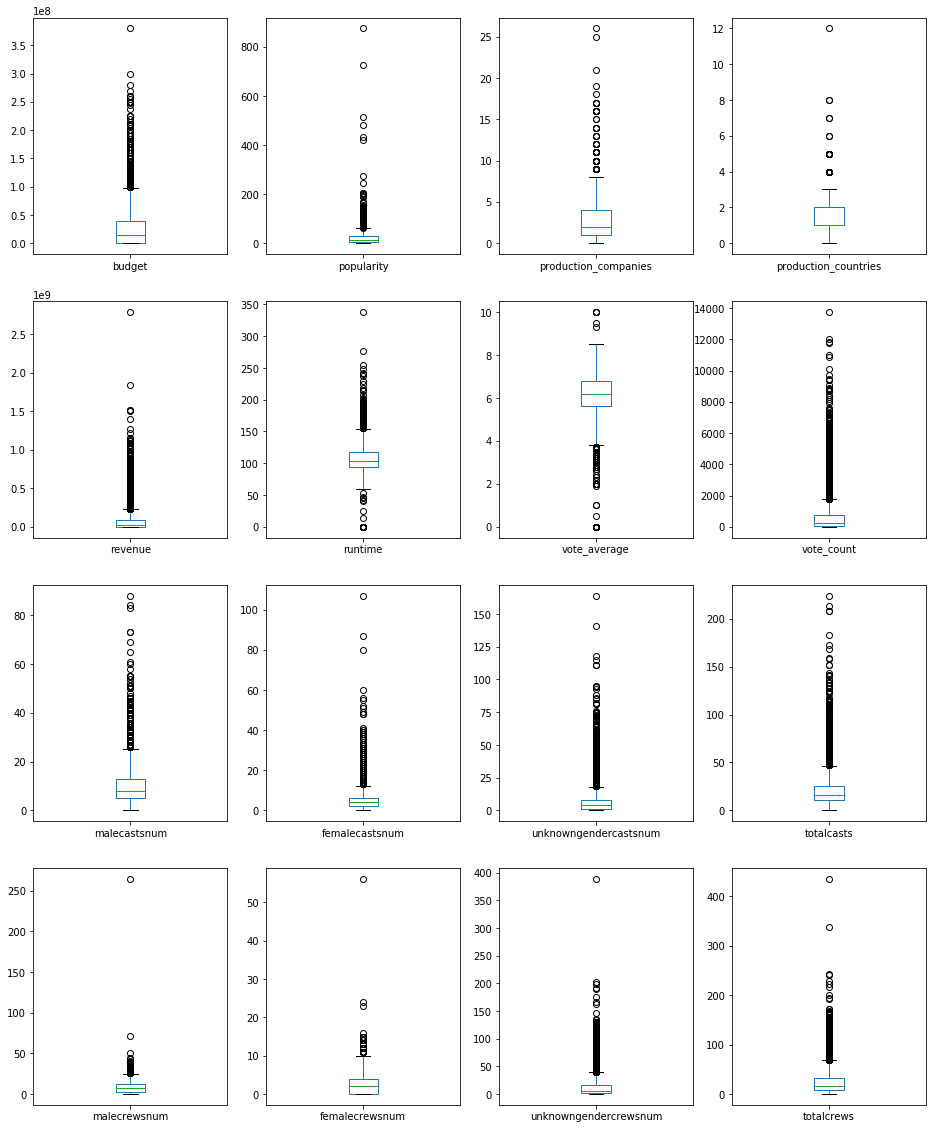

In [54]:
# Set the size of the figure
plt.rcParams["figure.figsize"] = [16,20]
# Plot boxplots for all attributes
df_train[["budget", "popularity", "production_companies", "production_countries", "revenue", "runtime", "vote_average", "vote_count", "malecastsnum", "femalecastsnum", "unknowngendercastsnum", "totalcasts", "malecrewsnum", "femalecrewsnum", "unknowngendercrewsnum", "totalcrews"]].plot(kind='box', subplots=True, layout=(4,4))
plt.show()

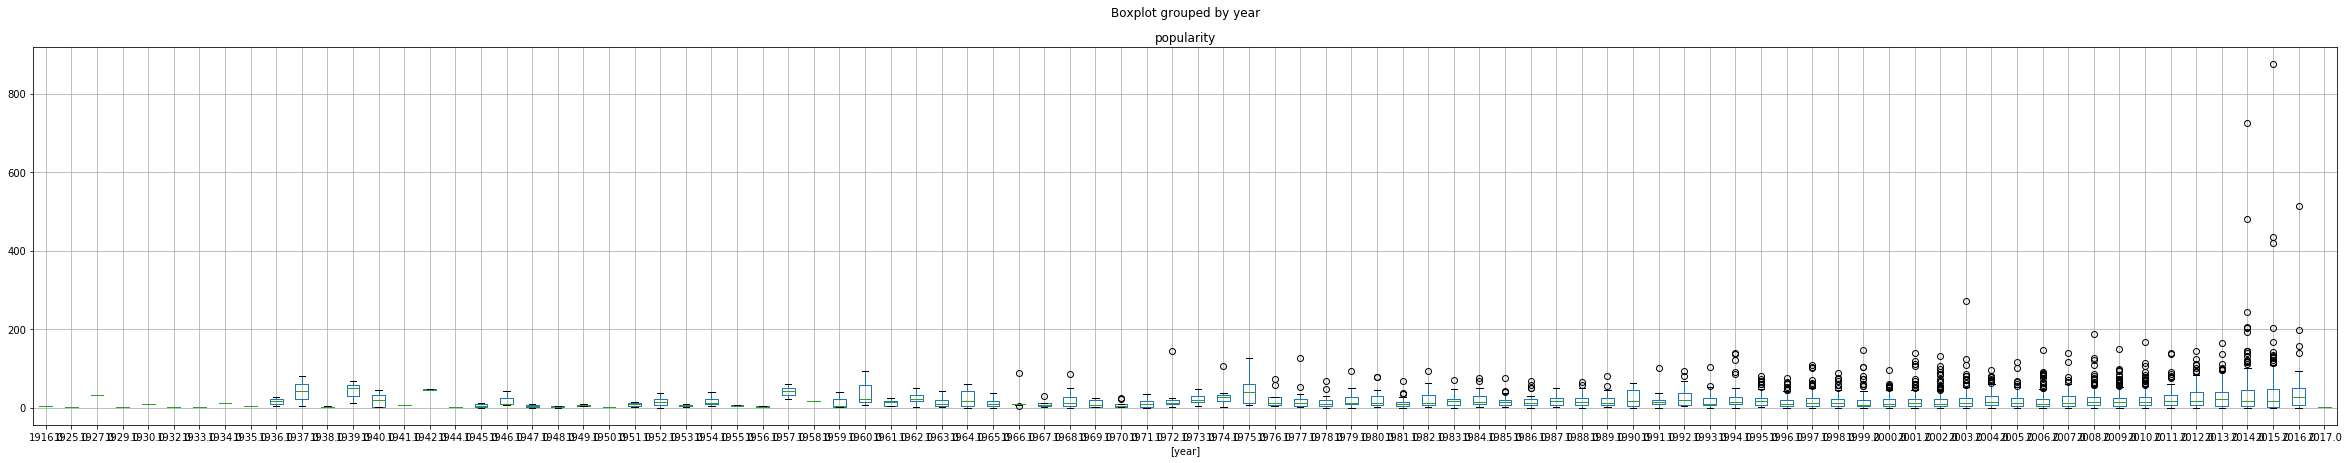

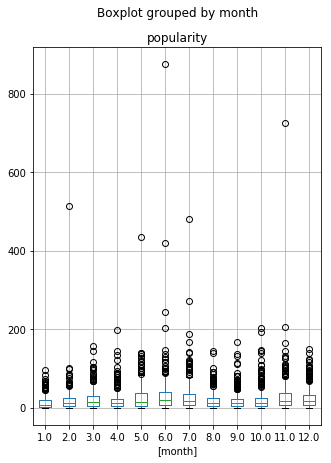

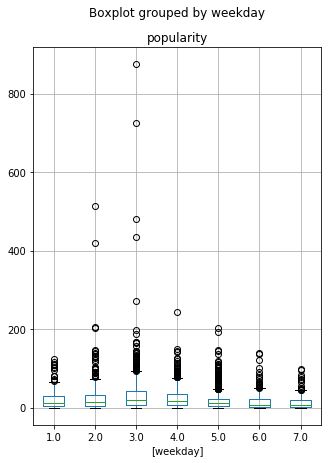

In [57]:
# Set the size of the figure
plt.rcParams["figure.figsize"] = [40,7]
# Plot a boxplot for a specific attributes
df_train[['popularity', "year"]].boxplot(by='year')
plt.show()

# Set the size of the figure
plt.rcParams["figure.figsize"] = [5,7]
# Plot a boxplot for a specific attributes
df_train[['popularity', "month"]].boxplot(by='month')
plt.show()

# Set the size of the figure
plt.rcParams["figure.figsize"] = [5,7]
# Plot a boxplot for a specific attributes
df_train[['popularity',"weekday"]].boxplot(by='weekday')
plt.show()

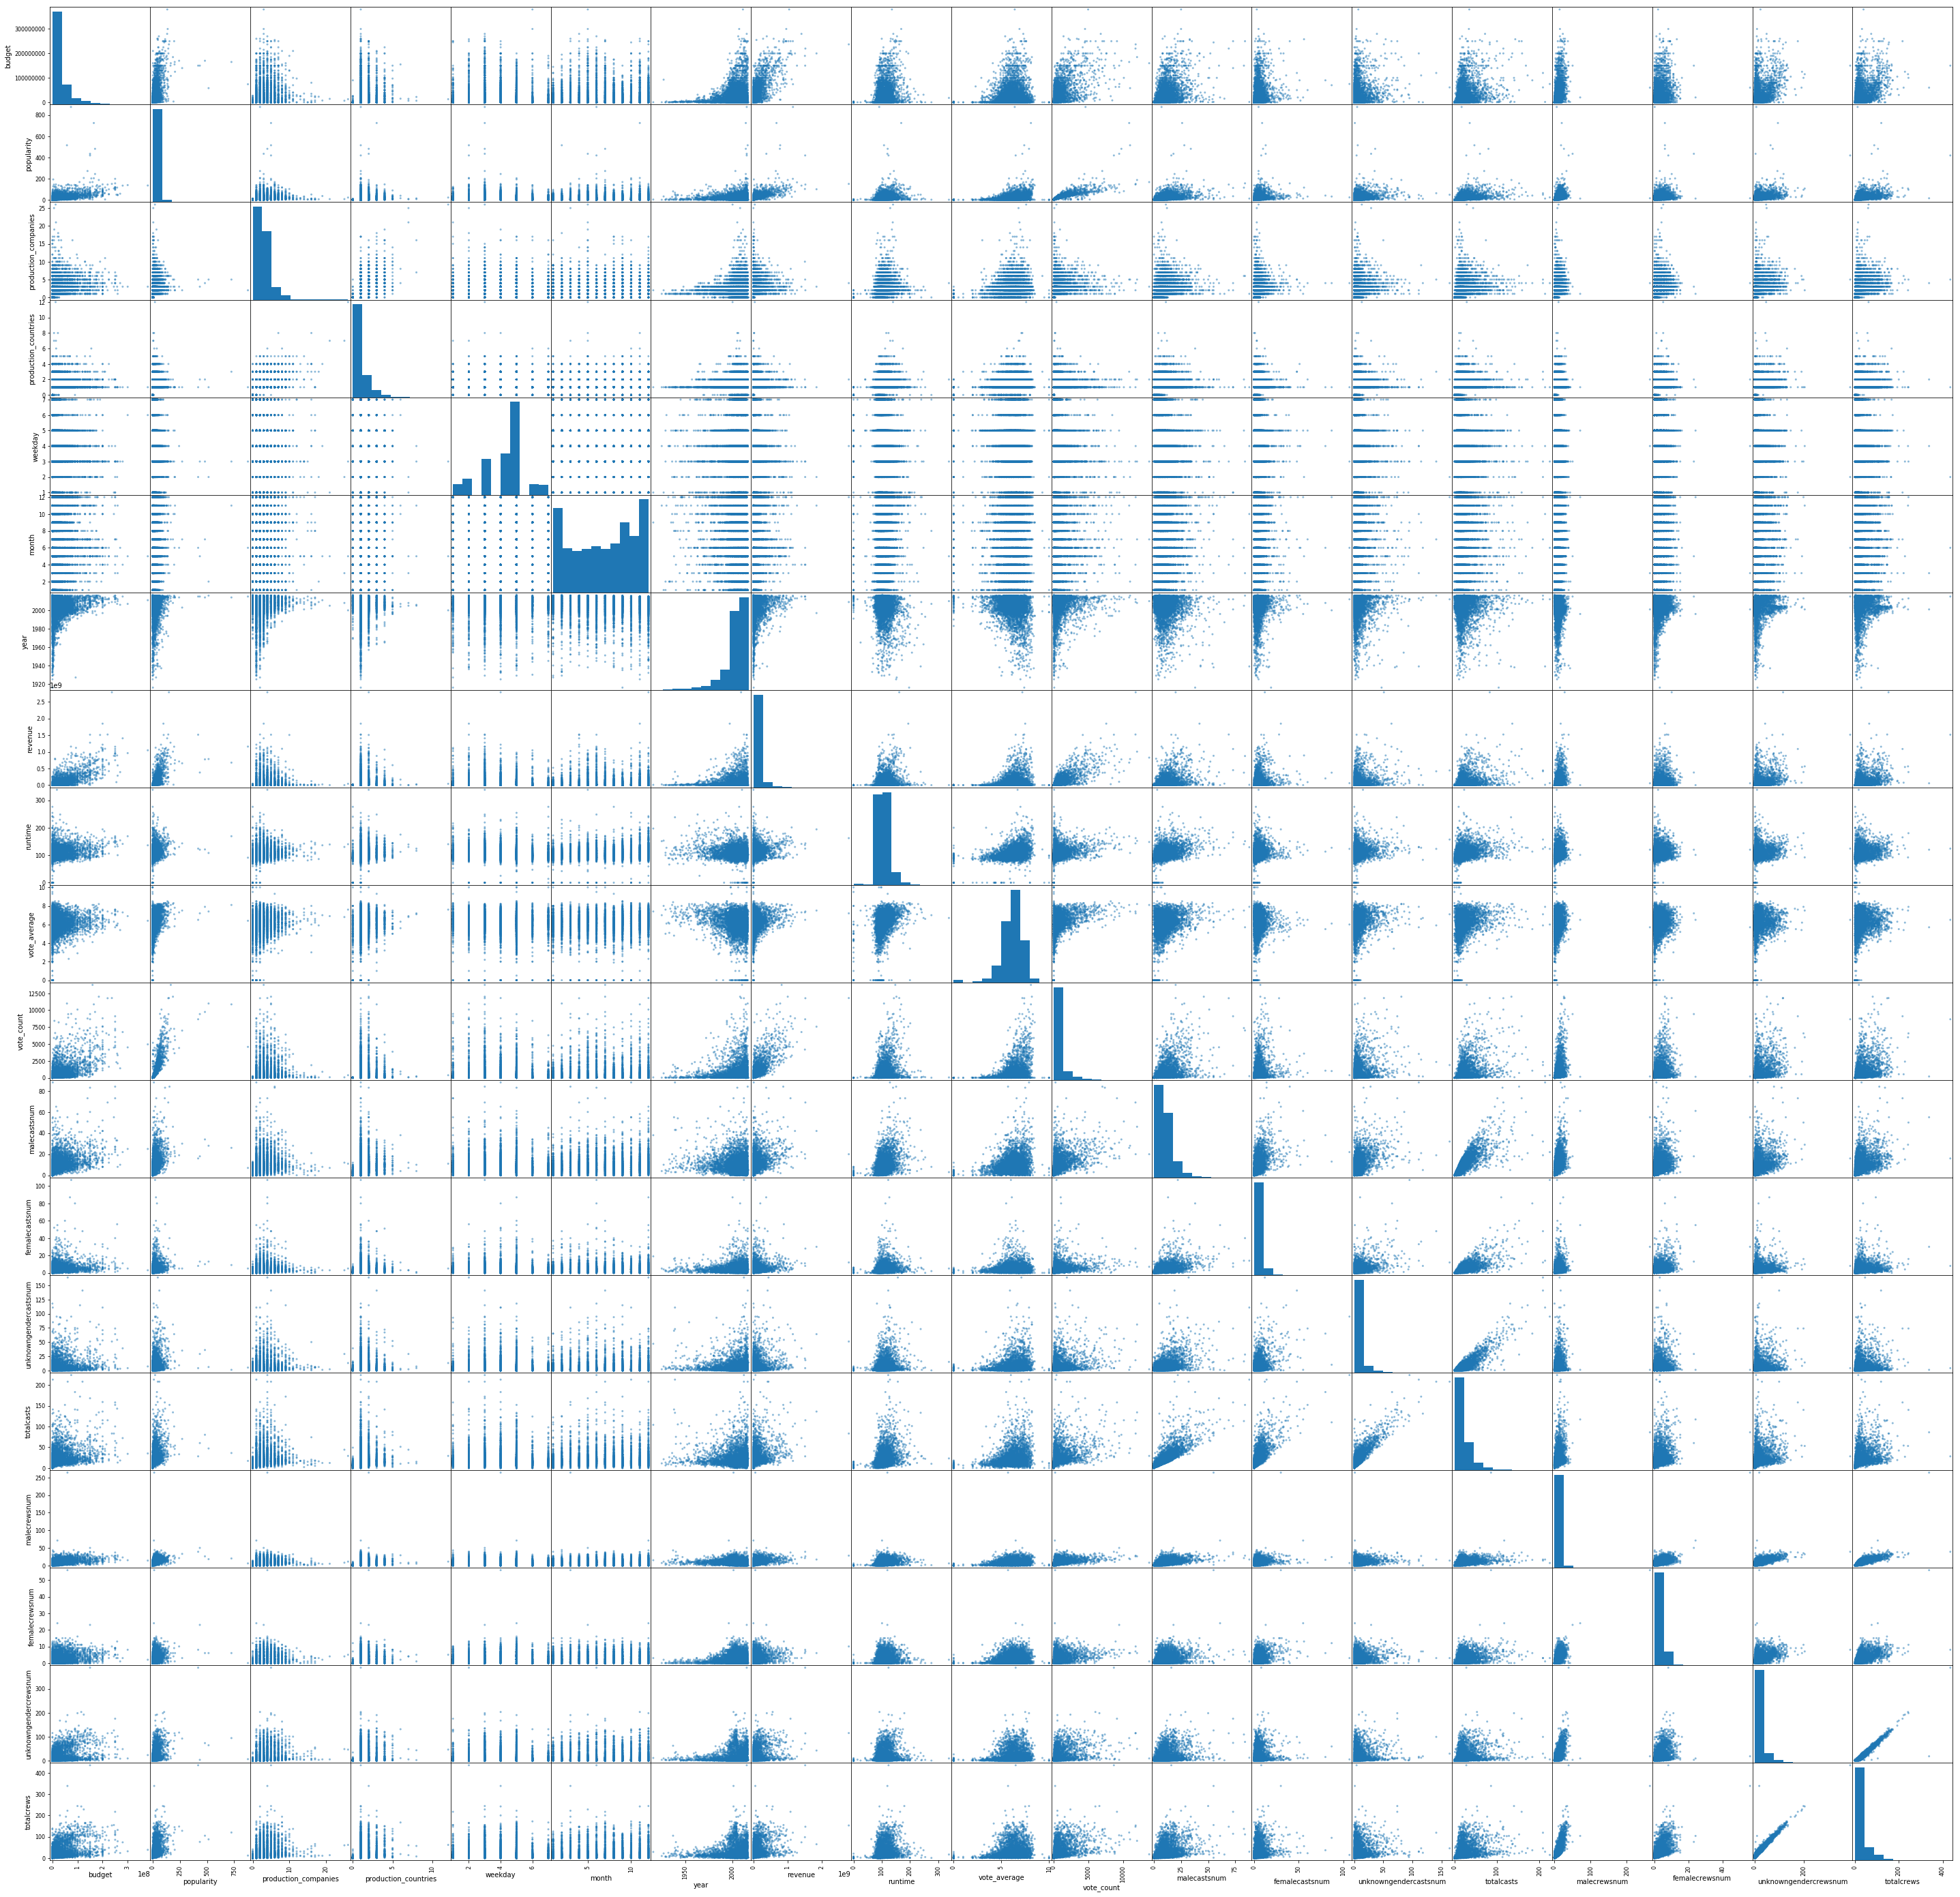

In [61]:
# Set the size of the figure
plt.rcParams["figure.figsize"] = [50,50]
# Plot scatter
pd.plotting.scatter_matrix(df_train[["budget", "popularity", "production_companies", "production_countries", "weekday", "month", "year", "revenue", "runtime", "vote_average", "vote_count", "malecastsnum", "femalecastsnum", "unknowngendercastsnum", "totalcasts", "malecrewsnum", "femalecrewsnum", "unknowngendercrewsnum", "totalcrews"]])
plt.show()

In [9]:
#descriptive statistics summary - sub in values to try
df_train['popularity'].describe()

count    4803.000000
mean       21.492301
std        31.816650
min         0.000000
25%         4.668070
50%        12.921594
75%        28.313505
max       875.581305
Name: popularity, dtype: float64

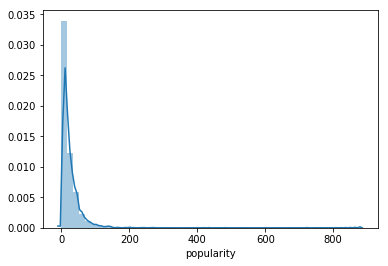

In [10]:
#histogram - sub in values to try
sns.distplot(df_train['popularity']);

In [60]:
#skewness and kurtosis - sub in values to try
print("Skewness: %f" % df_train['popularity'].skew())
print("Kurtosis: %f" % df_train['popularity'].kurt()) # peak sharpness

Skewness: 9.721416
Kurtosis: 191.995820


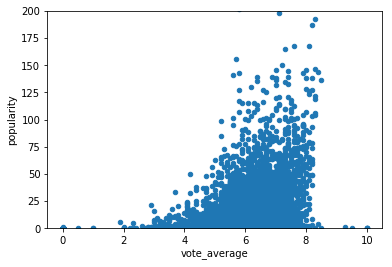

In [22]:
#scatter plot vote_average/popularity - sub in values to try
var = 'vote_average'
data = pd.concat([df_train['popularity'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='popularity', ylim=(0,200));

In [18]:
# Outlier detection - sub in values to try
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers
outlier_datapoints = detect_outlier(df_train['popularity'])
print(outlier_datapoints)
print("Number of Outliers: %d" % len(outlier_datapoints))
print("Number of Data Points: %d" % len(df_train['popularity']))

[150.437577, 139.082615, 134.27922900000002, 155.790452, 145.84737900000005, 144.448633, 135.413856, 120.965743, 198.372395, 418.708552, 118.078691, 125.114374, 139.272042, 187.322927, 120.725053, 128.65596399999998, 243.79174300000003, 130.311355, 203.73459, 481.098624, 724.247784, 167.58371, 127.284427, 202.042635, 165.125366, 434.278564, 120.09361, 271.972889, 206.227151, 143.350376, 138.049577, 167.93287, 132.397737, 123.630332, 138.433168, 140.849495, 139.575085, 136.886704, 875.581305, 146.75739099999996, 143.041543, 514.5699559999998, 138.133331, 127.084938, 131.815575, 136.747729, 118.968562, 145.364591, 126.393695, 121.463076, 143.659698, 127.525581, 192.528841]
Number of Outliers: 53
Number of Data Points: 4803
